# Nonlinear curve fitting by stochastic gradient descent

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 1, Tutorials

Go to https://machine-learning-for-physicists.org and follow the link to the current course website there (the website offers code like this for download)!

This notebook shows how stochastic gradient descent can help fit an arbitrary function (neural networks essentially do the same, but in much higher dimensions and with many more parameters)

In [1]:
#from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace
import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

In [2]:
# Define the parametrized nonlinear function
def f(theta,x):
    """
    theta are the parameters
    x are the input values (can be an array)
    """
    return(theta[0]/((x-theta[1])**2+1.0))

# Define the gradient of the parametrized function
# with respect to its parameters
def f_grad(theta,x):
    """
    Return the gradient of f with respect to theta
    shape [n_theta,n_samples]
    where n_theta=len(theta)
    and n_samples=len(x)
    """
    return(np.array([
        1./((x-theta[1])**2+1.0)
    ,
        2*(x-theta[1])*theta[0]/((x-theta[1])**2+1.0)
    ]
    ))

# Define the actual function (the target, to be fitted)
def true_f(x):
    return( 3.0/((x-0.5)**2+1.0) )

# Get randomly sampled x values
def samples(nsamples,width=2.0):
    return(width*np.random.randn(nsamples))

# Get the average cost function on a grid of 2 parameters
def get_avg_cost(theta0s,theta1s,nsamples):
    n0=len(theta0s)
    n1=len(theta1s)
    C=np.zeros([n0,n1])
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],theta1s[j1]])
            x=samples(nsamples)
            C[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    return(C)

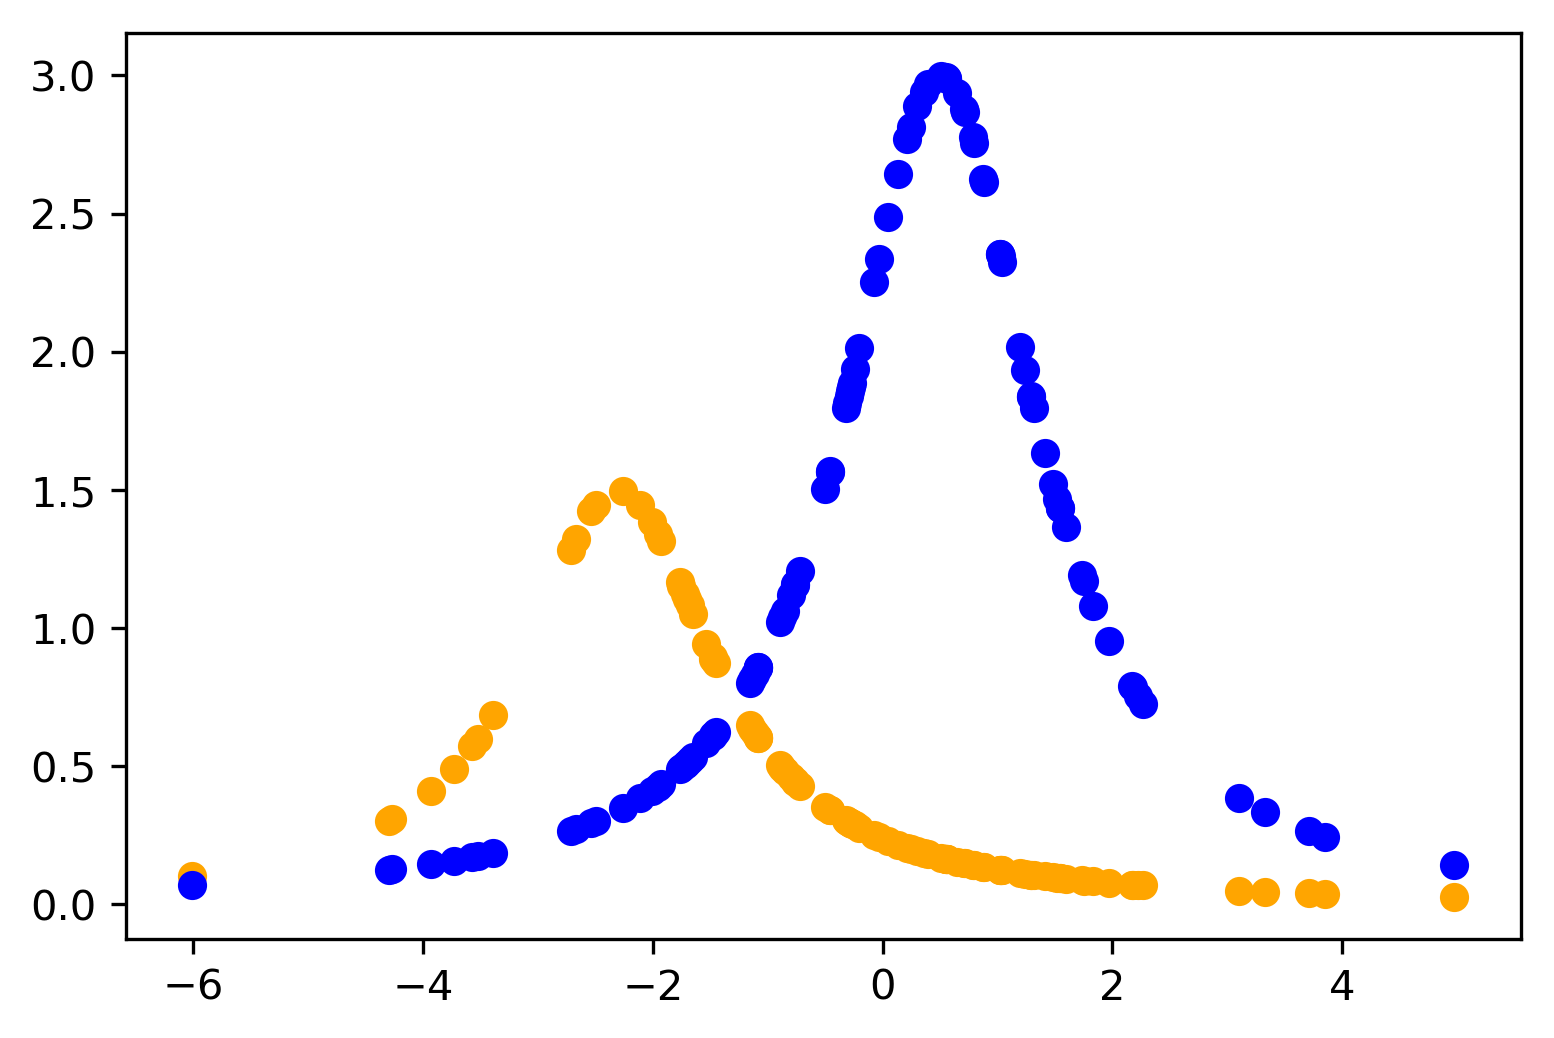

In [3]:
# take arbitrary parameters as starting point
theta=np.array([1.5,-2.3])

x=samples(100)
# illustrate the parametrized function, at sampled points,
# compare against actual function
plt.scatter(x,f(theta,x),color="orange")
plt.scatter(x,true_f(x),color="blue")
plt.show()

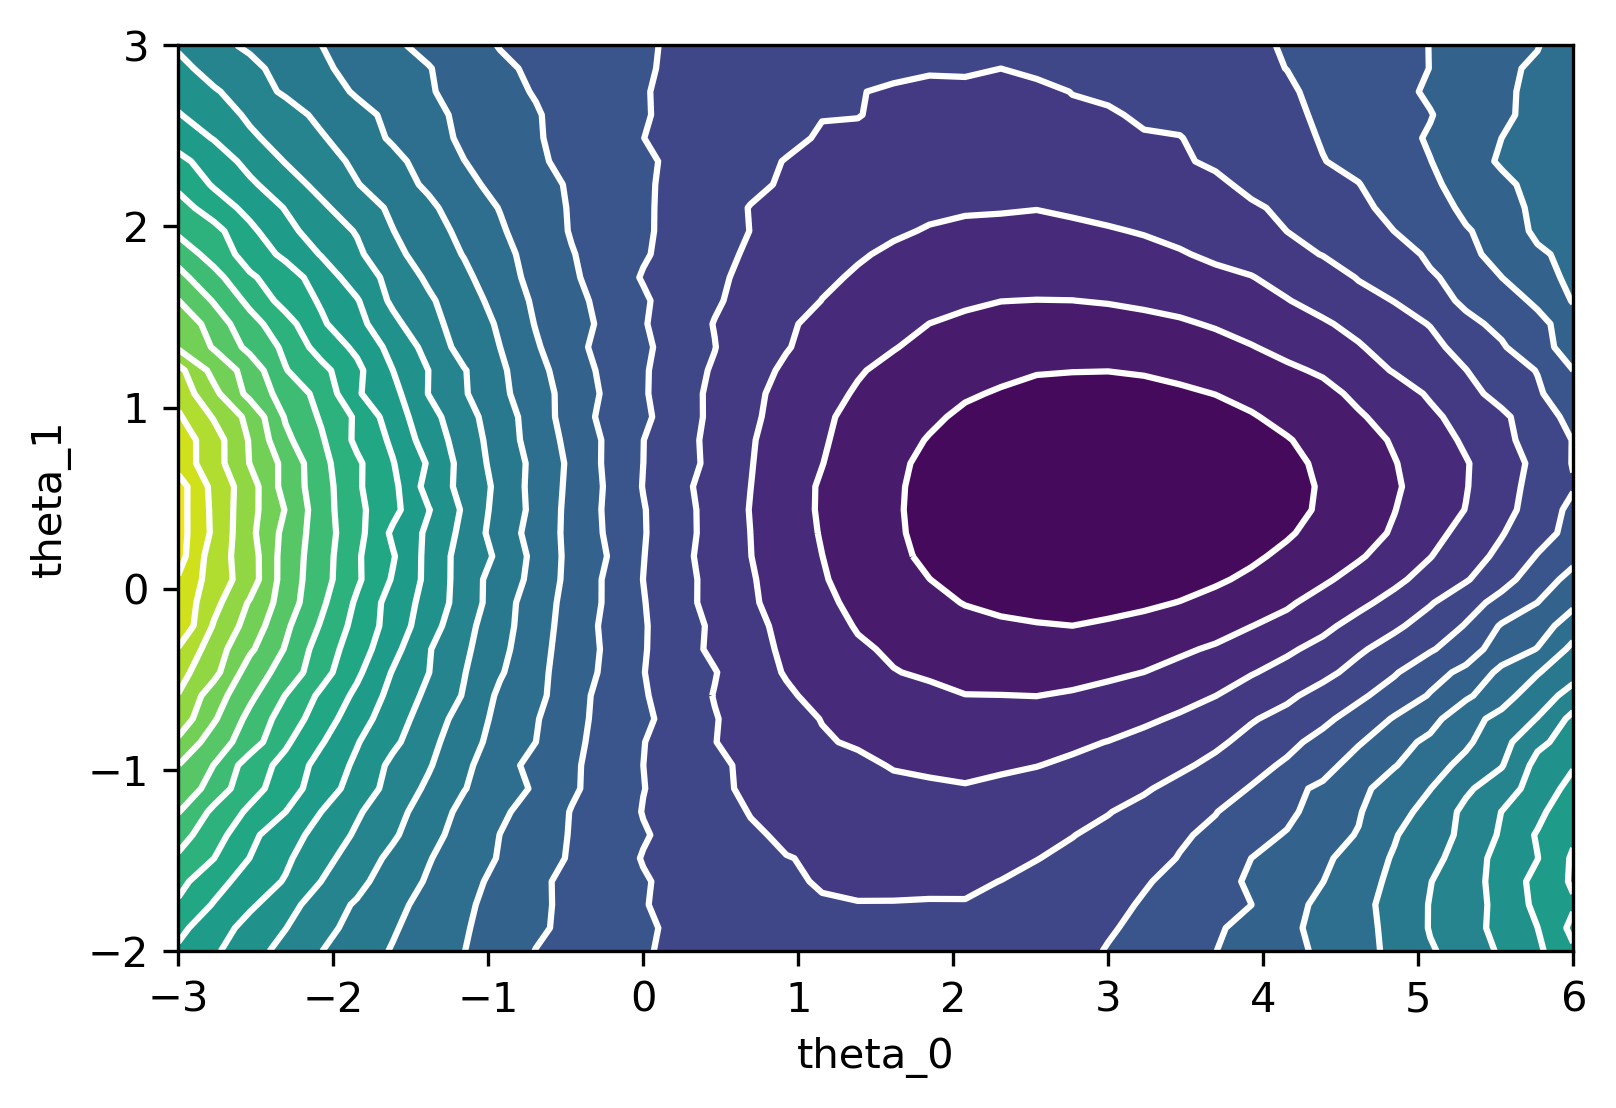

In [5]:
# get average cost function:
theta0s=np.linspace(-3,6,40)
theta1s=np.linspace(-2,3,40)
C=get_avg_cost(theta0s,theta1s,10000)
nlevels=20
X,Y=np.meshgrid(theta0s,theta1s,indexing='ij')
plt.contourf(X,Y,C,nlevels)
plt.contour(X,Y,C,nlevels,colors="white")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

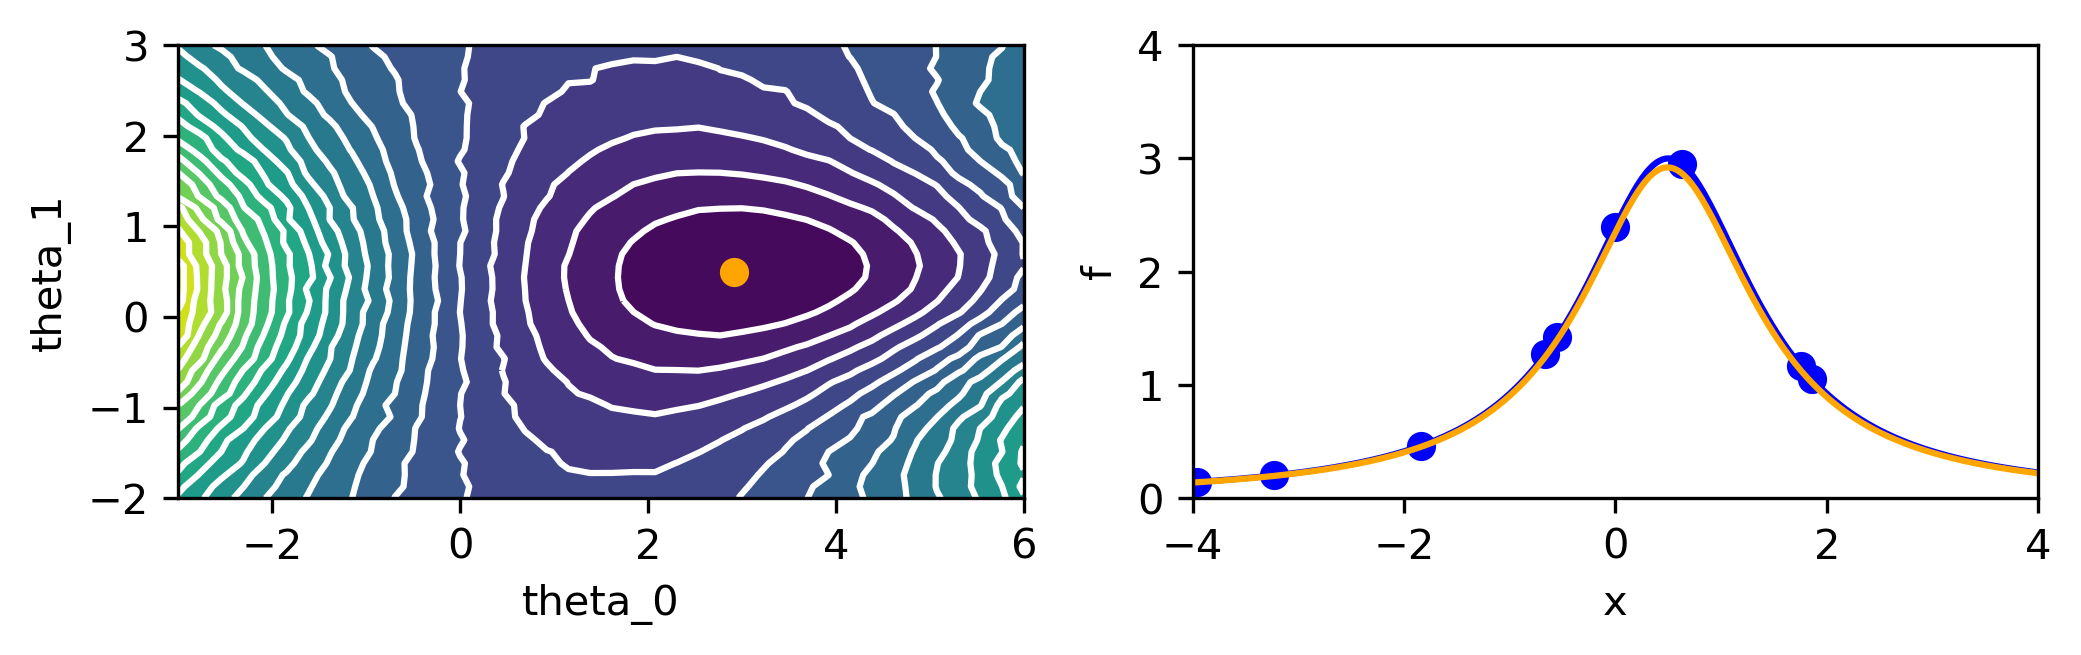

In [6]:
# Now: do gradient descent and, for each step,
# plot the (sampled) true function vs. the parametrized function
# Also plot the current location of parameters theta
# (over the average cost function)

# import functions for updating display 
# (simple animation)
from IPython.display import clear_output
from time import sleep

# take arbitrary parameters as starting point
theta=np.array([-1.0,2.0])

# do many steps of stochastic gradient descent,
# continue showing the comparison!
eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step
nsteps=100 # how many steps we take

x_sweep=np.linspace(-4,4,300)

for n in range(nsteps):
    #############################
    # THE CRUCIAL THREE LINES:  #
    #############################
    x=samples(nsamples) # get random samples
    # deviation from true function (vector):
    deviation=f(theta,x)-true_f(x)
    # do one gradient descent step:
    theta-=eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)
    
    # Now: Plotting
    # compare true function (blue) against
    # parametrized function (orange)
    # blue dots indicate random points where
    # the true function was sampled in this step
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,2))
    
    nlevels=20
    ax[0].contourf(X,Y,C,nlevels)
    ax[0].contour(X,Y,C,nlevels,colors="white")
    ax[0].scatter([theta[0]],[theta[1]],color="orange")
    ax[0].set_xlim(theta0s[0],theta0s[-1])
    ax[0].set_ylim(theta1s[0],theta1s[-1])
    ax[0].set_xlabel("theta_0")
    ax[0].set_ylabel("theta_1")    
    
    ax[1].plot(x_sweep,true_f(x_sweep),color="blue")
    ax[1].scatter(x,true_f(x),color="blue")
    ax[1].plot(x_sweep,f(theta,x_sweep),color="orange")
    ax[1].set_xlim(-4,4)
    ax[1].set_ylim(0.0,4.0)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("f") 
    
    plt.show()
    sleep(0.3)



## Your own examples!

In [7]:
# Consider for example a parametrized function
#       np.sin(theta[1]*(x-theta[0]))/(10.0+x**2)
# and a true function (in the shape of a wavepacket)
#       np.sin(3.0*(x-1.5))/(10.0+x**2)
#
# (1) Plot and understand the function
# (2) Plot and understand the cost function
# (3) Run the fitting (find suitable values for eta etc.)